### Lead Scoring Case Study
By: Aniket Shambharkar, Ananna Patra & Shiva Kumar

### Problem Statement

Lead Scoring Case Study
X-Education is an education company sells online Education courses to professionals and marketing through online advertisements. Company gets information through different channels and if candidates enquring with certain education level it calls lead. Typically lead conversion is 30% of certain education. Company identifying Hot Leads on certain criteria also. Lead conversion ratio is lesser than number of enrollment. comapny given Target to achieve 80% of total enrollment.

### Goals of the Case Study :
1) Building logistics regression model to finding leads for Company and help to achieve potential targets.
2) Alternative approach should be ready in case Company's requirement changes in futures should be flexible.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the data set

In [2]:
df=pd.read_csv('Leads.csv')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection

In [4]:
df.shape

(9240, 37)

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


From above statistical summary we can see that column 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' having outliers ,cause there is significant difference between min and max values.We will verify it later by using EDA.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Cleaning & Preparation

In [7]:
# To check for duplicates
df.loc[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No duplicates in the data!

In [8]:
# To check for duplicates in columns
print(sum(df.duplicated(subset = 'Lead Number')))
print(sum(df.duplicated(subset = 'Prospect ID')))

0
0


As the values in these columns are different for each entry/row, there are just indicative of the ID and are not important from an analysis point of view. Hence, can be dropped.

In [9]:
df = df.drop(['Lead Number','Prospect ID'],1)

As it can be seen, there are select values in many columns. This means that the person did not select any option for the given field. Hence, these are like NULL values.

In [10]:
# To convert 'Select' values to NaN
df = df.replace('Select', np.nan)

In [11]:
# To get percentage of null values in each column
round((df.isnull().sum()/df.shape[0])*100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

We'll drop columns with more than 50% of missing values as it does not make sense to impute these many values. But the variable 'Lead Quality', which has 51.6% missing values seems promising. So we'll keep it for now.

In [12]:
# To drop columns with more than 50% of missing values as it does not make sense to impute these many values
df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>52)].columns, 1)

For other columns, we have to work on column by column basis.

1) For categorical variables, we'll analyse the count/percentage plots.
2) For numerical variable, we'll describe the variable and analyse the box plots

In [13]:
# Function for percentage plots
def percent_plot(var):
    values = (df[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

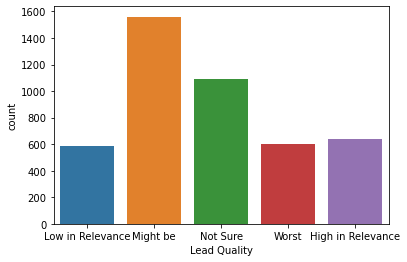

In [14]:
# For Lead Quality
sns.countplot(df['Lead Quality'])

Null values in the 'Lead Quality' column can be imputed with the value 'Not Sure' as we can assume that not filling in a column means the employee does not know or is not sure about the option.

In [15]:
df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Not Sure')

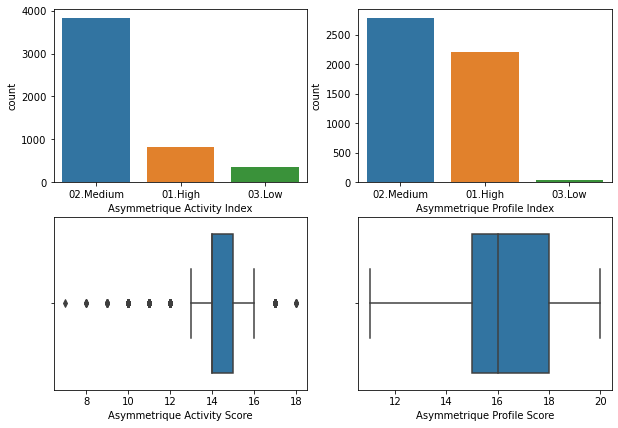

In [16]:
# For 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
asym_list = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
plt.figure(figsize=(10, 7))
for var in asym_list:
    plt.subplot(2,2,asym_list.index(var)+1)
    if 'Index' in var:
        sns.countplot(df[var])
    else:
        sns.boxplot(df[var])
plt.show()

In [17]:
# To describe numerical variables
df[asym_list].describe()

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


These four variables have more than 45% missing values and it can be seen from the plots that there is a lot of variation in them. So, it's not a good idea to impute 45% of the data. Even if we impute with mean/median for numerical variables, these values will not have any significant importance in the model. We'll have to drop these variables.

In [18]:
df = df.drop(asym_list,1)

In [19]:
# To get percentage of null values in each column
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

<AxesSubplot:xlabel='City', ylabel='count'>

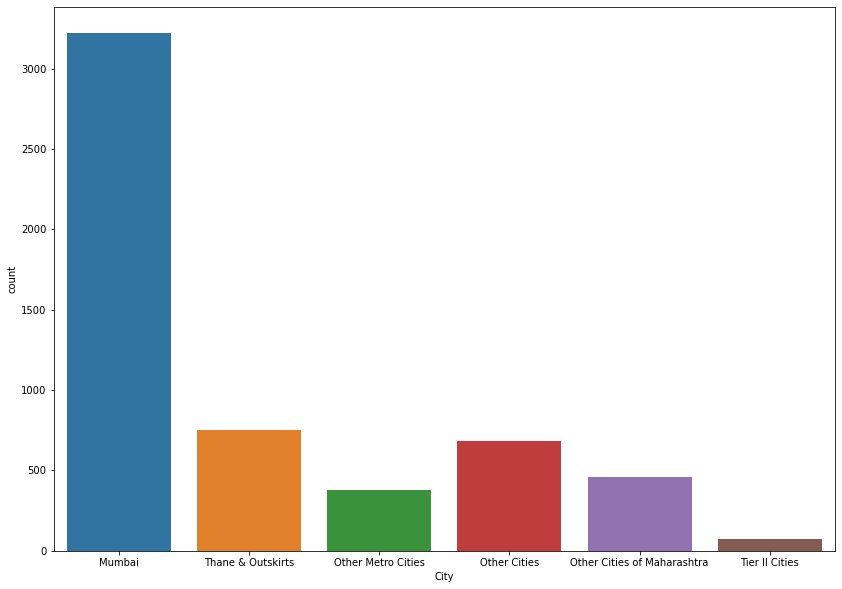

In [20]:
plt.figure(figsize=(14,10))
sns.countplot(df['City'])

Around 60% of the City values are Mumbai. We can impute 'Mumbai' in the missing values.

In [21]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

<AxesSubplot:xlabel='Specialization', ylabel='count'>

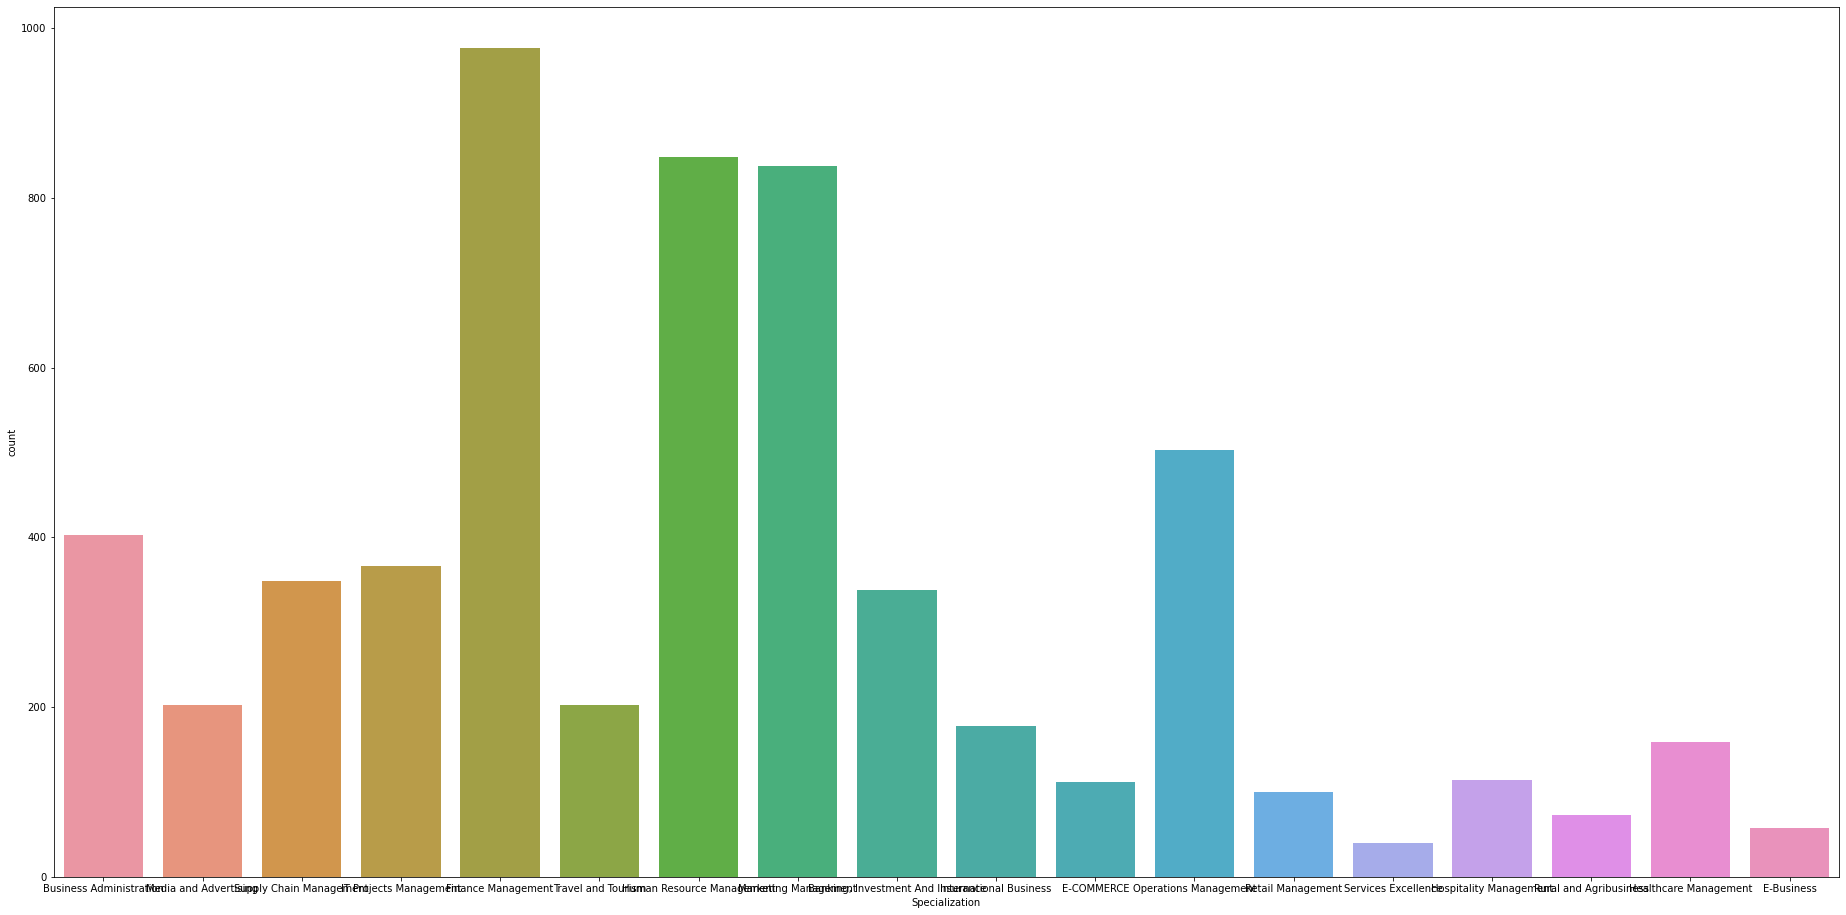

In [22]:
plt.figure(figsize=(32,16))
sns.countplot(df['Specialization'])

There are a lot of different specializations and it's not accurate to directly impute with the mean. It is possible that the person does not have a specialization or his/her specialization is not in the options. We can create a new column for that.

In [23]:
df['Specialization'] = df['Specialization'].replace(np.nan,'Others')

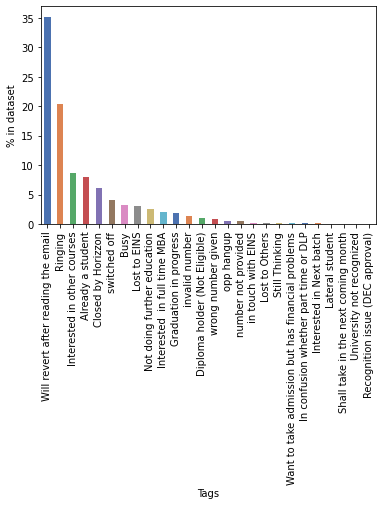

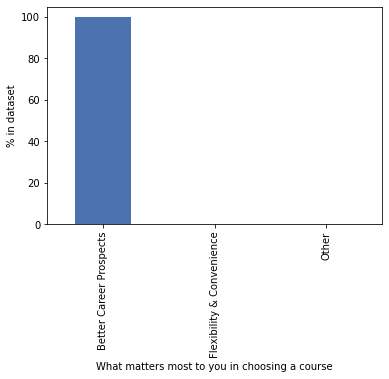

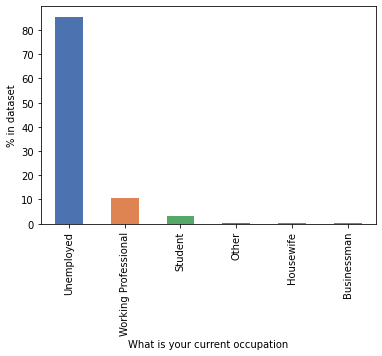

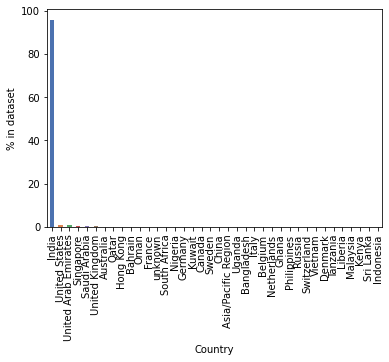

In [24]:
# For 'Tags', 'What matters most to you in choosing a course', 'What is your current occupation' and 'Country'
var_list = ['Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']

for var in var_list:
    percent_plot(var)
    plt.show()

In all these categorical variables, one value is clearly more frequent than all others. So it makes sense to impute with the most frequent values.

In [25]:
# To impute with the most frequent value
for var in var_list:
    top_frequent = df[var].describe()['top']
    df[var] = df[var].replace(np.nan, top_frequent)

In [26]:
# To get percentage of null values in each column
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

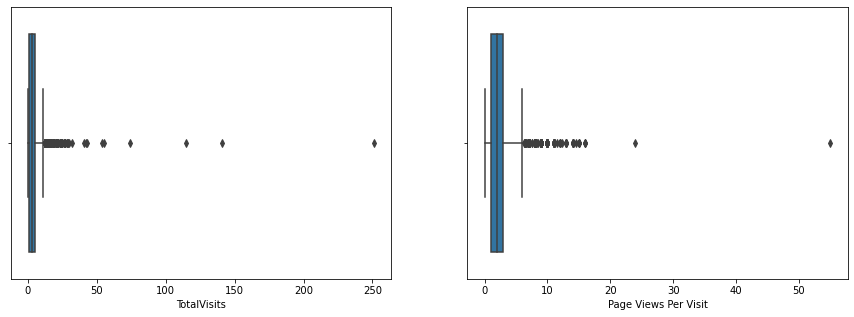

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [27]:
# For 'TotalVisits' and 'Page Views Per Visit'
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(df[var])
plt.show()

df[visit_list].describe()

From the above analysis, it can be seen that there is a lot of variation in both of the variables. As the percentage of missing values for both of them are less than 2%, it is better to drop the rows containing missing values.

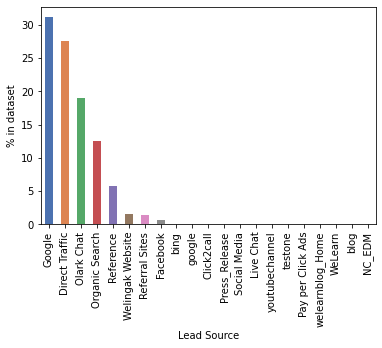

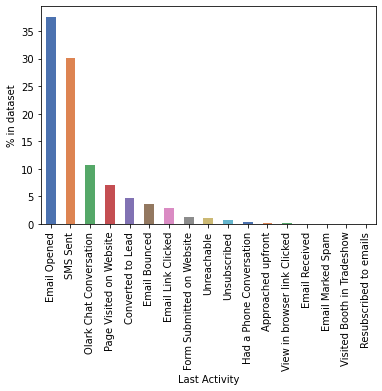

In [28]:
# For 'Lead Source' and 'Last Activity'
var_list = ['Lead Source', 'Last Activity']

for var in var_list:
    percent_plot(var)
    plt.show()

In these categorical variables, imputing with the most frequent value is not accurate as the next most frequent value has similar frequency. Also, as these variables have very little missing values, it is better to drop the rows containing these missing values. Hence, we'll drop the rows containing any missing missing values for above four variables.

In [29]:
# To drop the rows containing missing values
df.dropna(inplace = True)

In [30]:
# To get percentage of null values in each column
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

There are no more missing values. Data is cleaned!

### Data Visualization

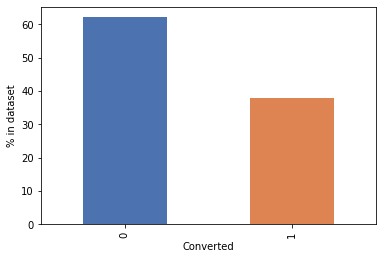

In [31]:
#For the target variable 'Converted'
percent_plot('Converted')

In [32]:
(sum(df['Converted'])/len(df['Converted'].index))*100

37.85541106458012

37.8% of the 'Converted' data is 1 ie. 37.8% of the leads are converted. This means we have enough data of converted leads for modelling.

### Visualising Numerical Variables and Outlier Treatment

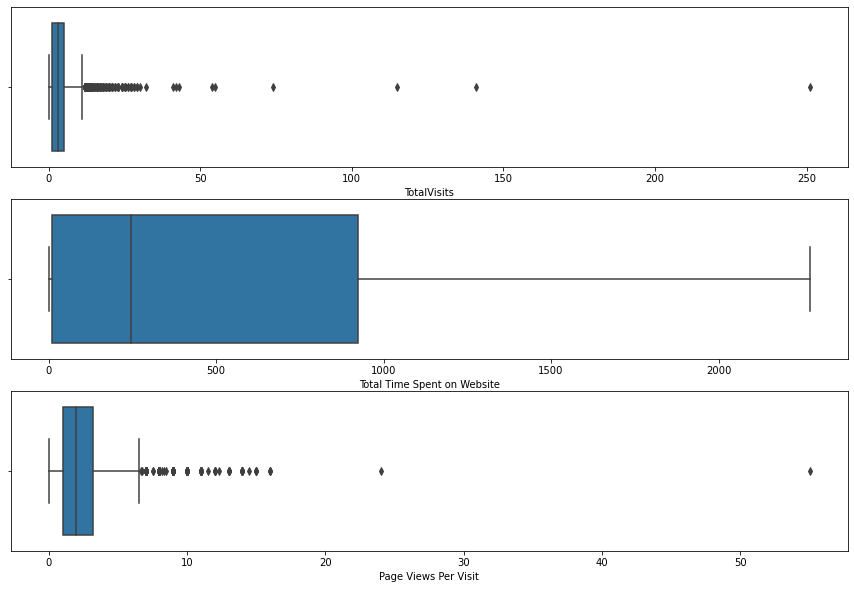

In [33]:
# Boxplots
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df[var])
plt.show()

In [34]:
df[num_var].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


From the boxplots, we can see that there are outliers present in the variables.

1) For 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we should cap these outliers at 95% value.
2) There are no significant outliers in 'Total Time Spent on Website'
3) For 'Page Views Per Visit', similar to 'TotalVisits', we should cap outliers at 95% value.
4) We don't need to cap at 5% as the minimum value at 5% value are same for all the variables.

In [35]:
# Outlier treatment
percentile = df['TotalVisits'].quantile([0.95]).values
df['TotalVisits'][df['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = df['Page Views Per Visit'].quantile([0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentile[0]] = percentile[0]

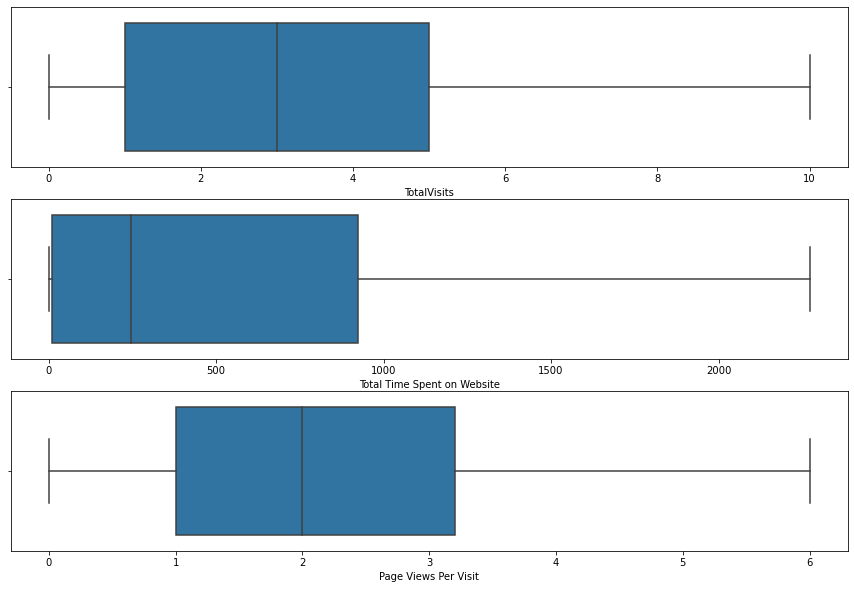

In [36]:
# Plot Boxplots to verify 
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df[var])
plt.show()

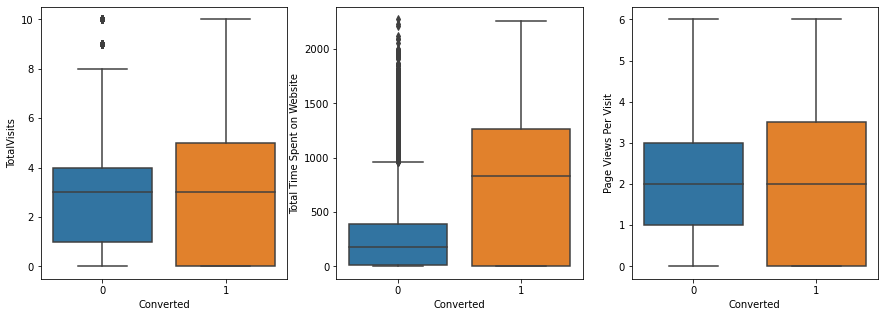

In [37]:
# To plot numerical variables against target variable to analyse relations
plt.figure(figsize=(15, 5))
for var in num_var:
    plt.subplot(1,3,num_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = df)
plt.show()

Observations:

1) 'TotalVisits' has same median values for both outputs of leads. No conclusion can be drwan from this.
2) People spending more time on the website are more likely to be converted. This is also aligned with our general knowledge.
3) 'Page Views Per Visit' also has same median values for both outputs of leads. Hence, inconclusive.

### Visualising Categorical Variables

In [38]:
# Categorical variables
cat_var = list(df.columns[df.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

We saw percentage plots for categorical variables while cleaning the data. Here, we'll see these plots with respect to target variable 'Converted'.

In [39]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted", data = df)
    plt.xticks(rotation = 90)
    plt.show()

# For multiple plots    
def plot_cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted", data = df)
        plt.xticks(rotation = 90)
    plt.show()

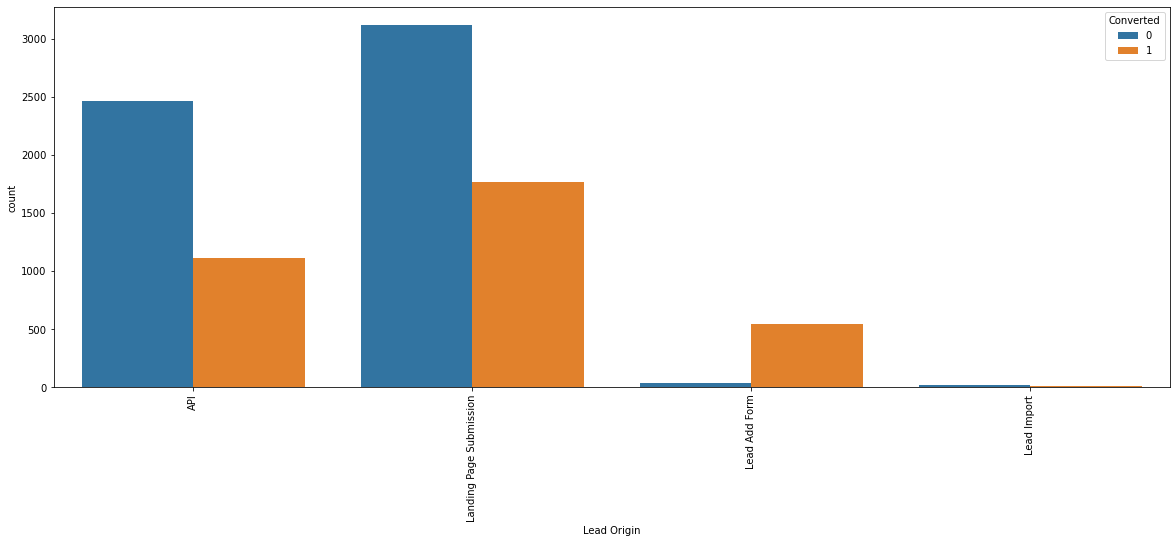

In [40]:
plot_cat_var(cat_var[0])

Observations for Lead Origin :
'API' and 'Landing Page Submission' generate the most leads but have less conversion rates of around 30%. Whereas, 'Lead Add Form' generates less leads but conversion rate is great. We should try to increase conversion rate for 'API' and 'Landing Page Submission', and increase leads generation using 'Lead Add Form'. 'Lead Import' does not seem very significant.

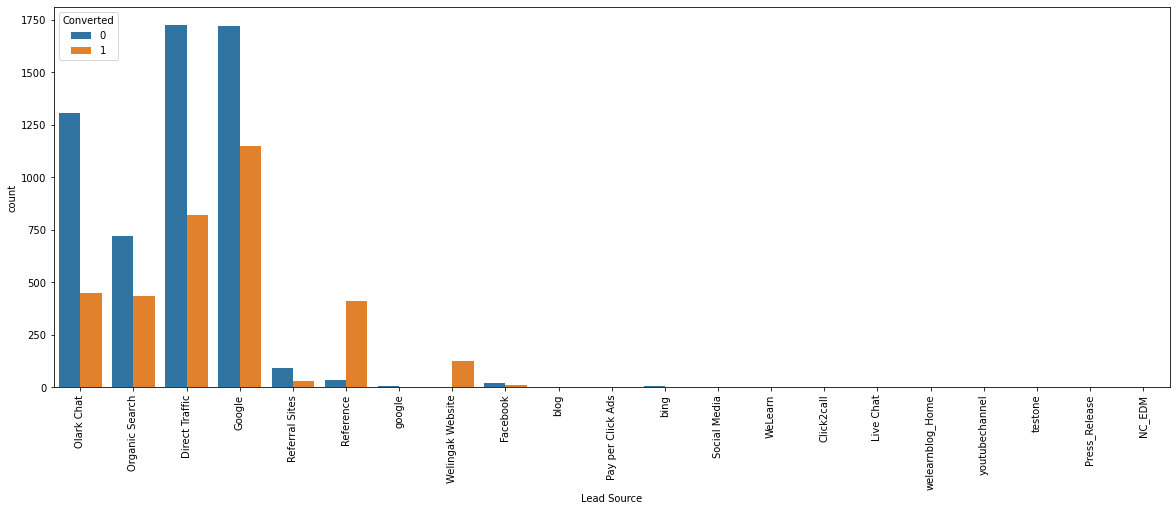

In [41]:
plot_cat_var(cat_var[1])

Observations for Lead Source :

1) Spelling error: We've to change 'google' to 'Google'
2) As it can be seen from the graph, number of leads generated by many of the sources are negligible. There are sufficient numbers till Facebook. We can convert all others in one single category of 'Others'.
3) 'Direct Traffic' and 'Google' generate maximum number of leads while maximum conversion rate is achieved through 'Reference' and 'Welingak Website'.

In [42]:
# To correct spelling error
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

In [43]:
categories = df['Lead Source'].unique()
categories

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

We can see that we require first eight categories.

In [44]:
# To reduce categories
df['Lead Source'] = df['Lead Source'].replace(categories[8:], 'Others')

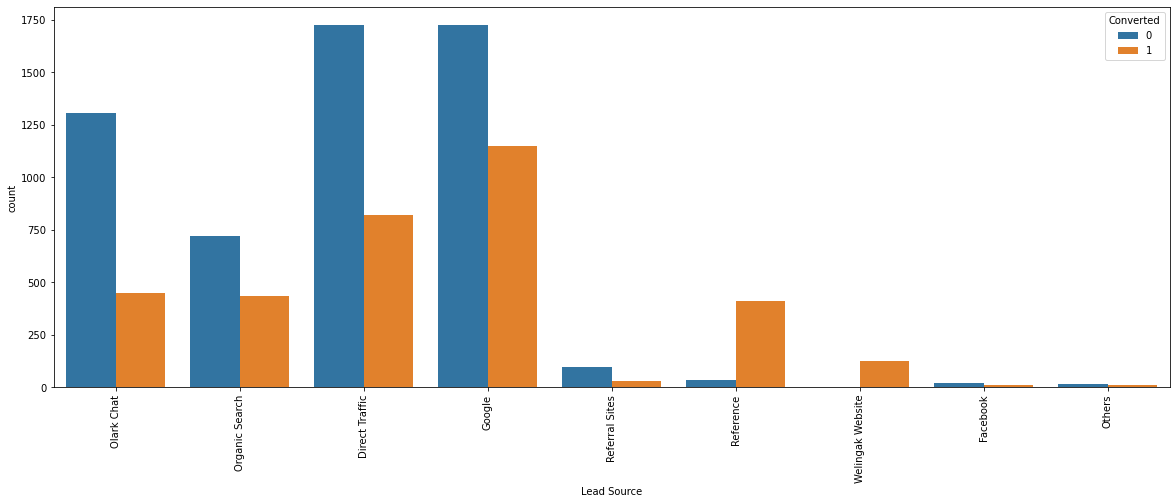

In [45]:
# To plot new categories
plot_cat_var(cat_var[1])

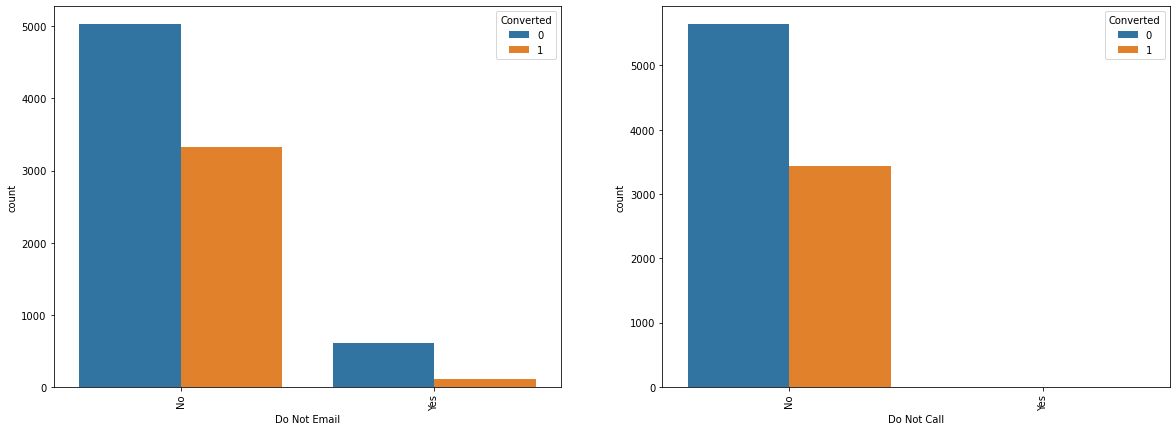

In [46]:
plot_cat_vars([cat_var[2],cat_var[3]])

Observations for Do Not Email and Do Not Call :
As one can expect, most of the responses are 'No' for both the variables which generated most of the leads.

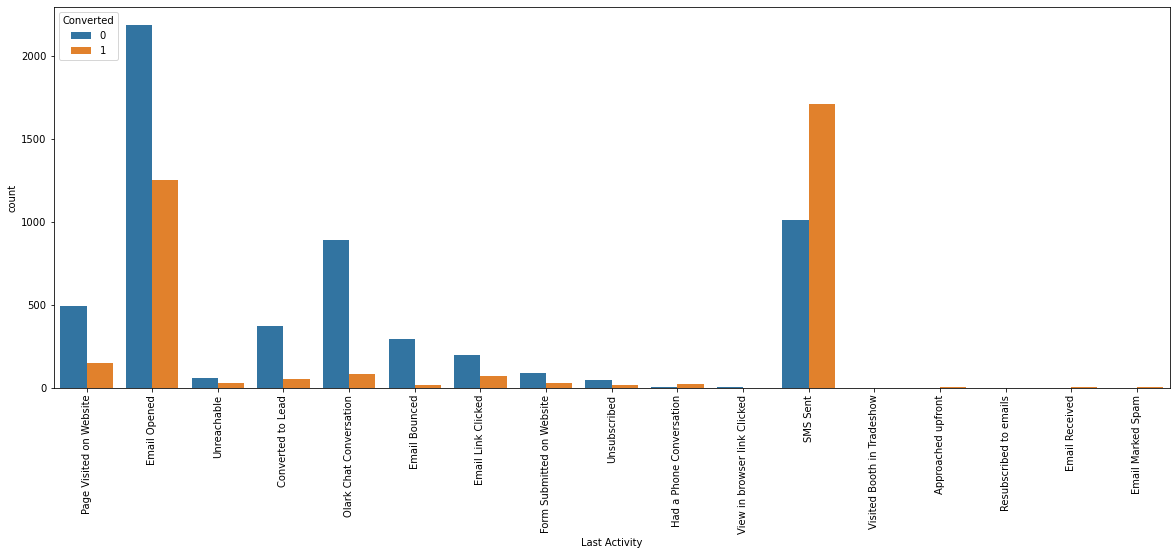

In [47]:
plot_cat_var(cat_var[4])

Observations for Last Activity :

Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. Its conversion rate is significantly high.
Categories after the 'SMS Sent' have almost negligible effect. We can aggregate them all in one single category.

In [48]:
categories = df['Last Activity'].unique()
categories

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

We can see that we do not require last five categories.

In [49]:
# To reduce categories
df['Last Activity'] = df['Last Activity'].replace(categories[-5:], 'Others')

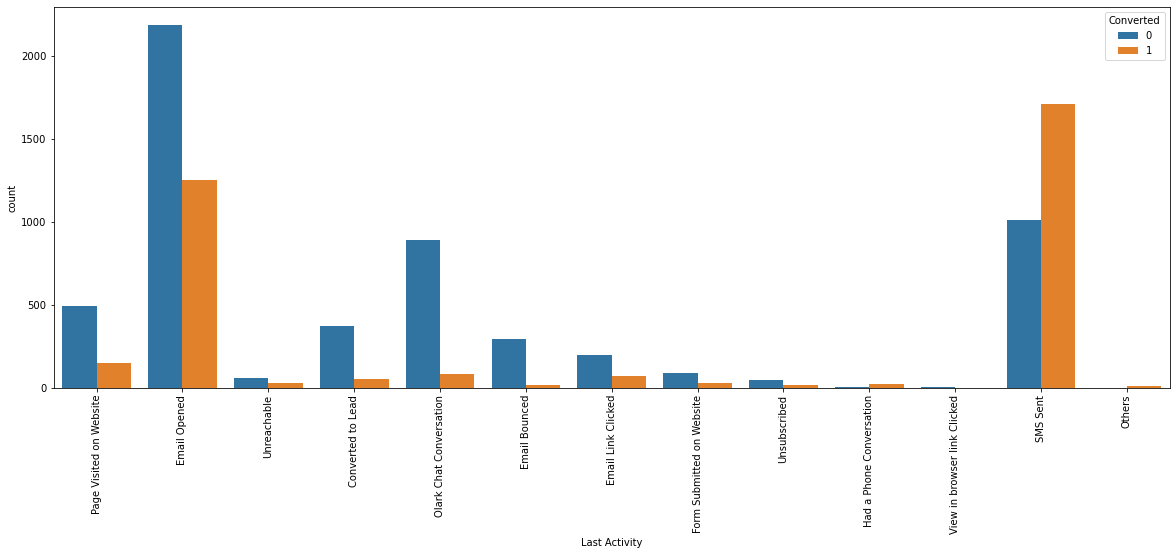

In [50]:
# To plot new categories
plot_cat_var(cat_var[4])

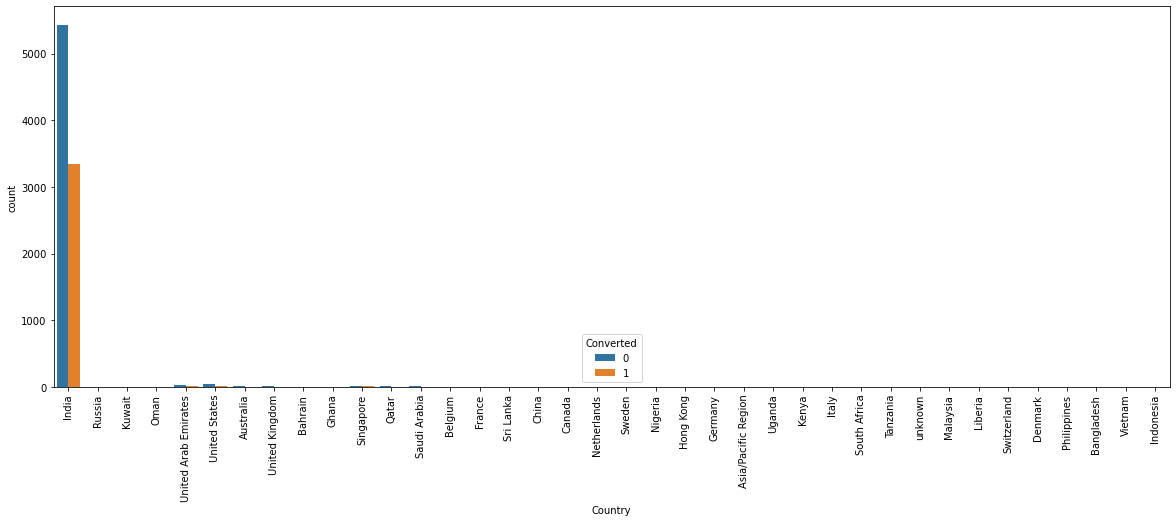

In [51]:
plot_cat_var(cat_var[5])

Observations for Country :
Most of the responses are for India. Others are not significant.

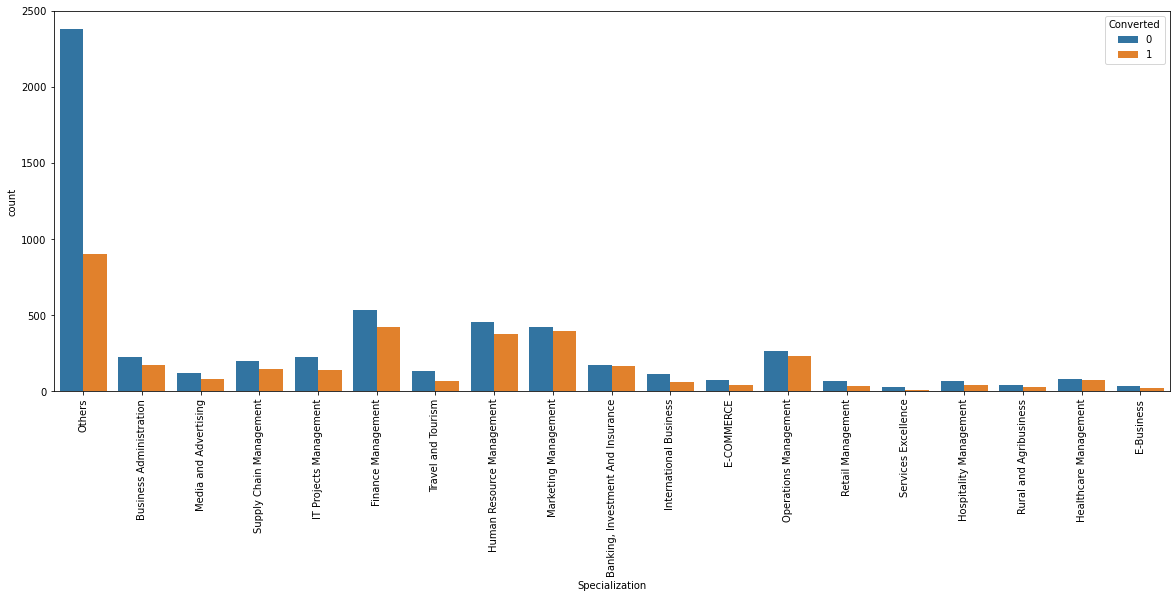

In [52]:
plot_cat_var(cat_var[6])

Observations for Specialization :
Conversion rates are mostly similar across different specializations.

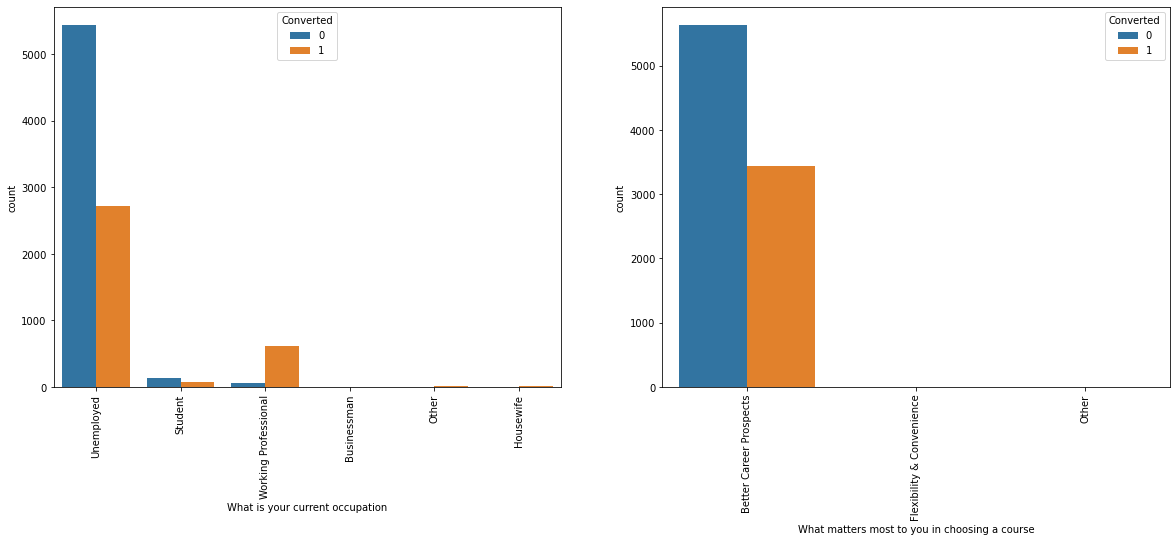

In [53]:
plot_cat_vars([cat_var[7],cat_var[8]])

Observations for What is your current occupation and What matters most to you in choosing a course :

The highest conversion rate is for 'Working Professional'. High number of leads are generated for 'Unemployed' but conversion rate is low.
Variable 'What matters most to you in choosing a course' has only one category with significant count.

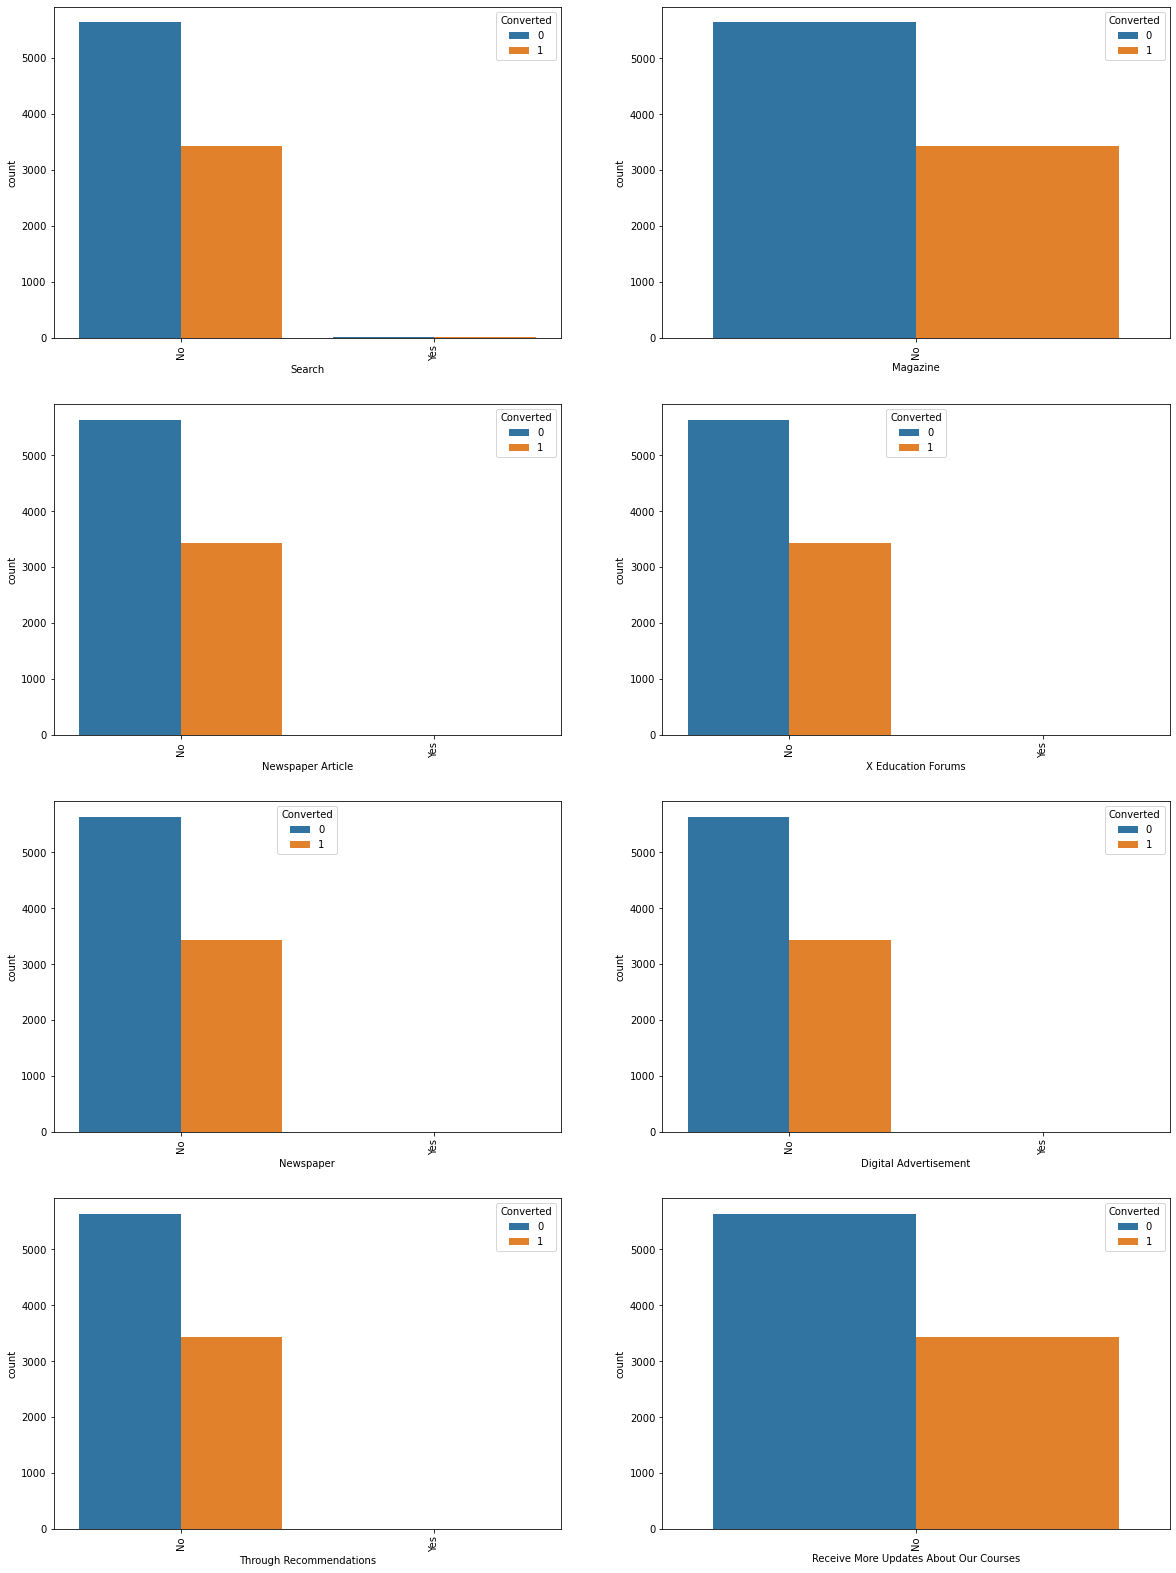

In [54]:
plot_cat_vars(cat_var[9:17])

Observations for Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, and Receive More Updates About Our Courses:
As all the above variables have most of the values as no, nothing significant can be inferred from these plots.

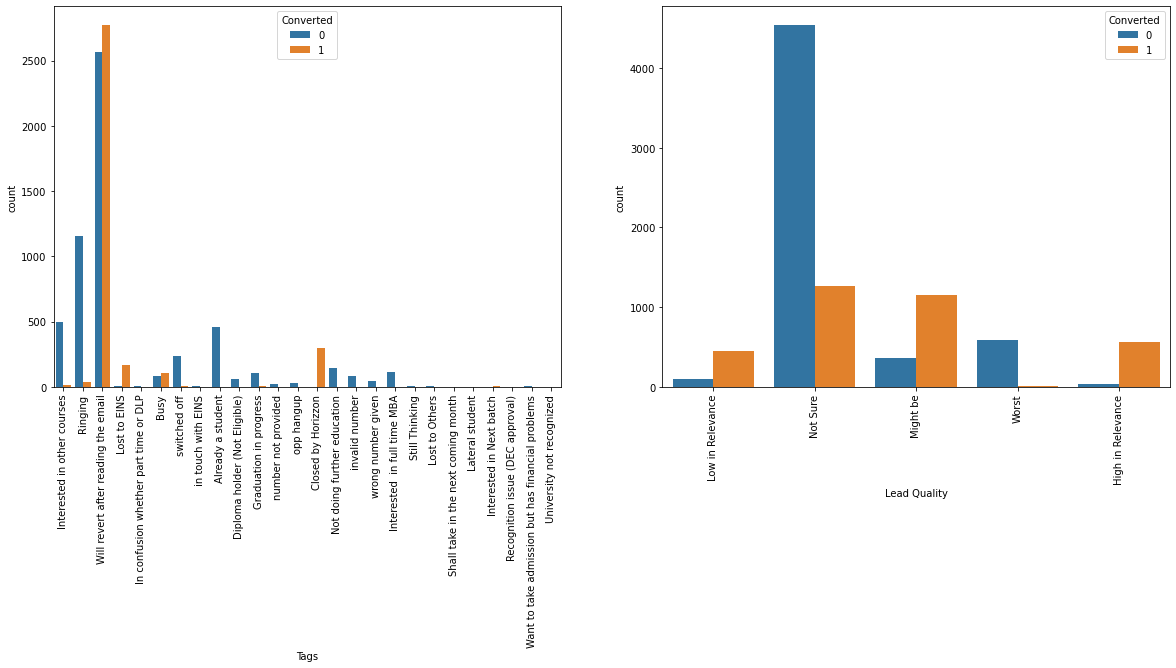

In [55]:
plot_cat_vars([cat_var[17],cat_var[18]])

Observations for Tags and Lead Quality:

In Tags, categories after 'Interested in full time MBA' have very few leads generated, so we can combine them into one single category.
Most leads generated and the highest conversion rate are both attributed to the tag 'Will revert after reading the email'.
In Lead quality, as expected, 'Might be' as the highest conversion rate while 'Worst' has the lowest.

In [56]:
categories = df['Tags'].unique()
categories

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

We can combine that last eight categories.

In [57]:
# To reduce categories
df['Tags'] = df['Tags'].replace(categories[-8:], 'Others')

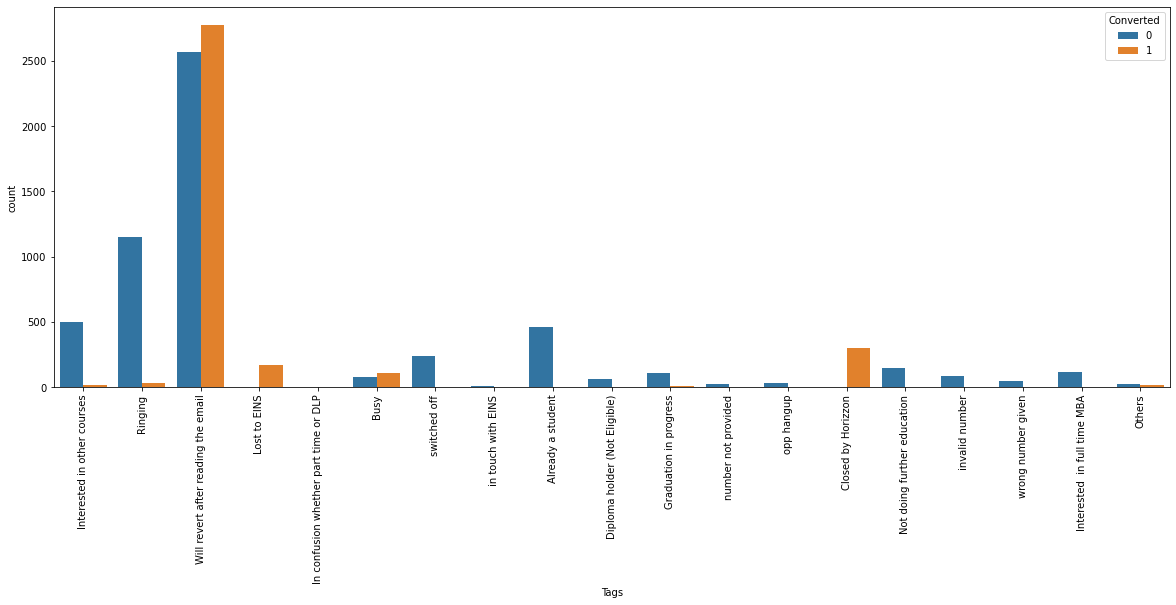

In [58]:
# To plot new categories
plot_cat_var(cat_var[17])

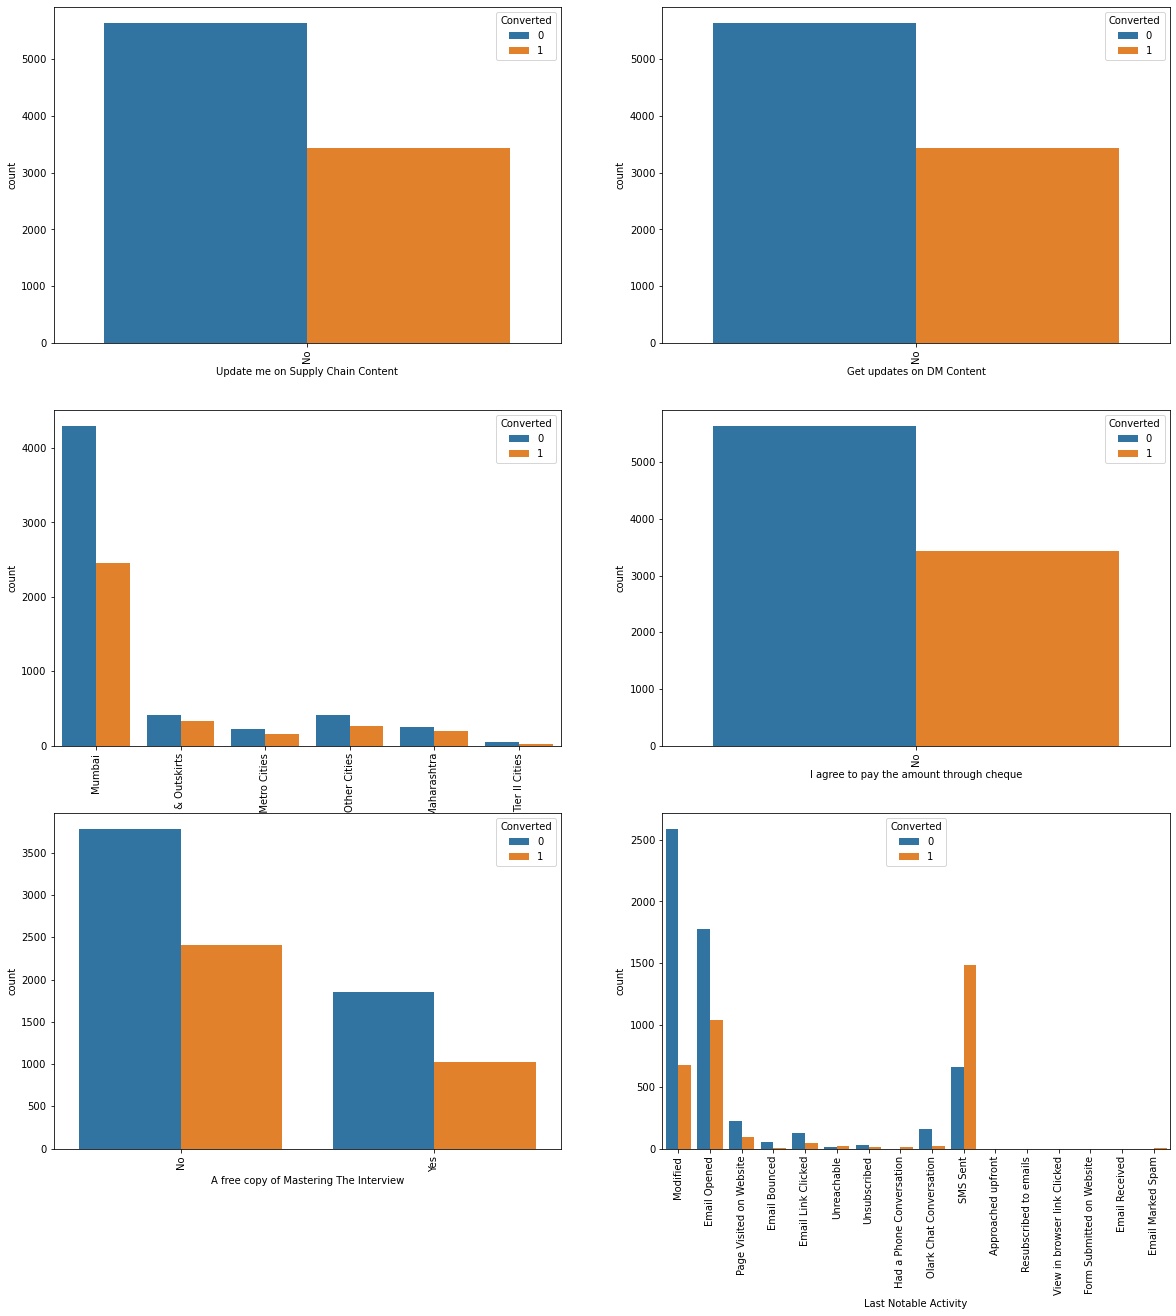

In [59]:
plot_cat_vars(cat_var[19:25])

Observations for Update me on Supply Chain Content, Get updates on DM Content, City, I agree to pay the amount through cheque, A free copy of Mastering The Interview, and Last Notable Activity :

1) Most of these variables are insignificant in analysis as many of them only have one significant category 'NO'.
2) In City, most of the leads are generated for 'Mumbai'.
3) In 'A free copy of Mastering The Interview', both categories have similar conversion rates.
4) In 'Last Notable Activity', we can combine categories after 'SMS Sent' similar to the variable 'Last Activity'. It has most generated leads for the category 'Modified' while most conversion rate for 'SMS Sent' activity.

In [60]:
categories = df['Last Notable Activity'].unique()
categories

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

We can see that we do not require last six categories.

In [61]:
# To reduce categories
df['Last Notable Activity'] = df['Last Notable Activity'].replace(categories[-6:], 'Others')

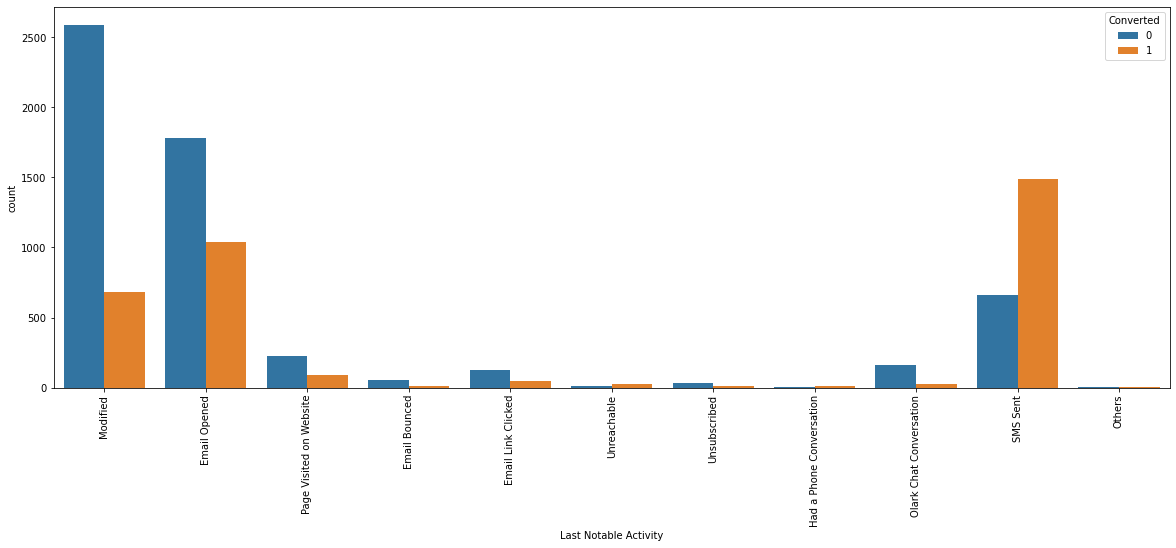

In [62]:
# To plot new categories
plot_cat_var(cat_var[24])

Based on the data visualization, we can drop the variables which are not significant for analysis and will not any information to the model.

In [63]:
df = df.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                          'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                          'Get updates on DM Content','I agree to pay the amount through cheque',
                          'A free copy of Mastering The Interview'],1)

In [64]:
# Final dataframe
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [65]:
df.shape

(9074, 14)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Tags                             9074 non-null   object 
 11  Lead Quality                     9074 non-null   object 
 12  City                

In [67]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,482.887481,2.265943
std,0.485053,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,10.000000,2272.000000,6.000000


### Data Preparation

In [68]:
# To convert binary variable (Yes/No) to 0/1
df['Do Not Email'] = df['Do Not Email'].map({'Yes': 1, 'No': 0})

##### Dummy Variable creation
For categorical variables with multiple levels, we create dummy features (one-hot encoded).

In [69]:
# Categorical variables
cat_var = list(df.columns[df.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [70]:
# To create dummy variables and drop first ones
dummy = pd.get_dummies(df[cat_var], drop_first=True)

# To add result to the original dataframe
df = pd.concat([df, dummy], axis=1)

# To drop the original variables
df = df.drop(cat_var,1)

In [71]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


### Train-Test Split

In [72]:
# Importing required package
from sklearn.model_selection import train_test_split

In [73]:
# To put feature variable to X
X = df.drop(['Converted'],axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [74]:
# To put response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [75]:
# To split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [76]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [77]:
# Scale the three numeric features present in the dataset

MMS = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = MMS.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,0.2,0.178347,0.333333,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,1,0.2,0.085355,0.333333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0.0,0.000000,0.000000,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4750,0,0.2,0.619946,0.333333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0,0.5,0.711590,0.416667,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [78]:
# To check the conversion rate
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

37.85541106458012

We have 37.85% conversion rate.

### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap.

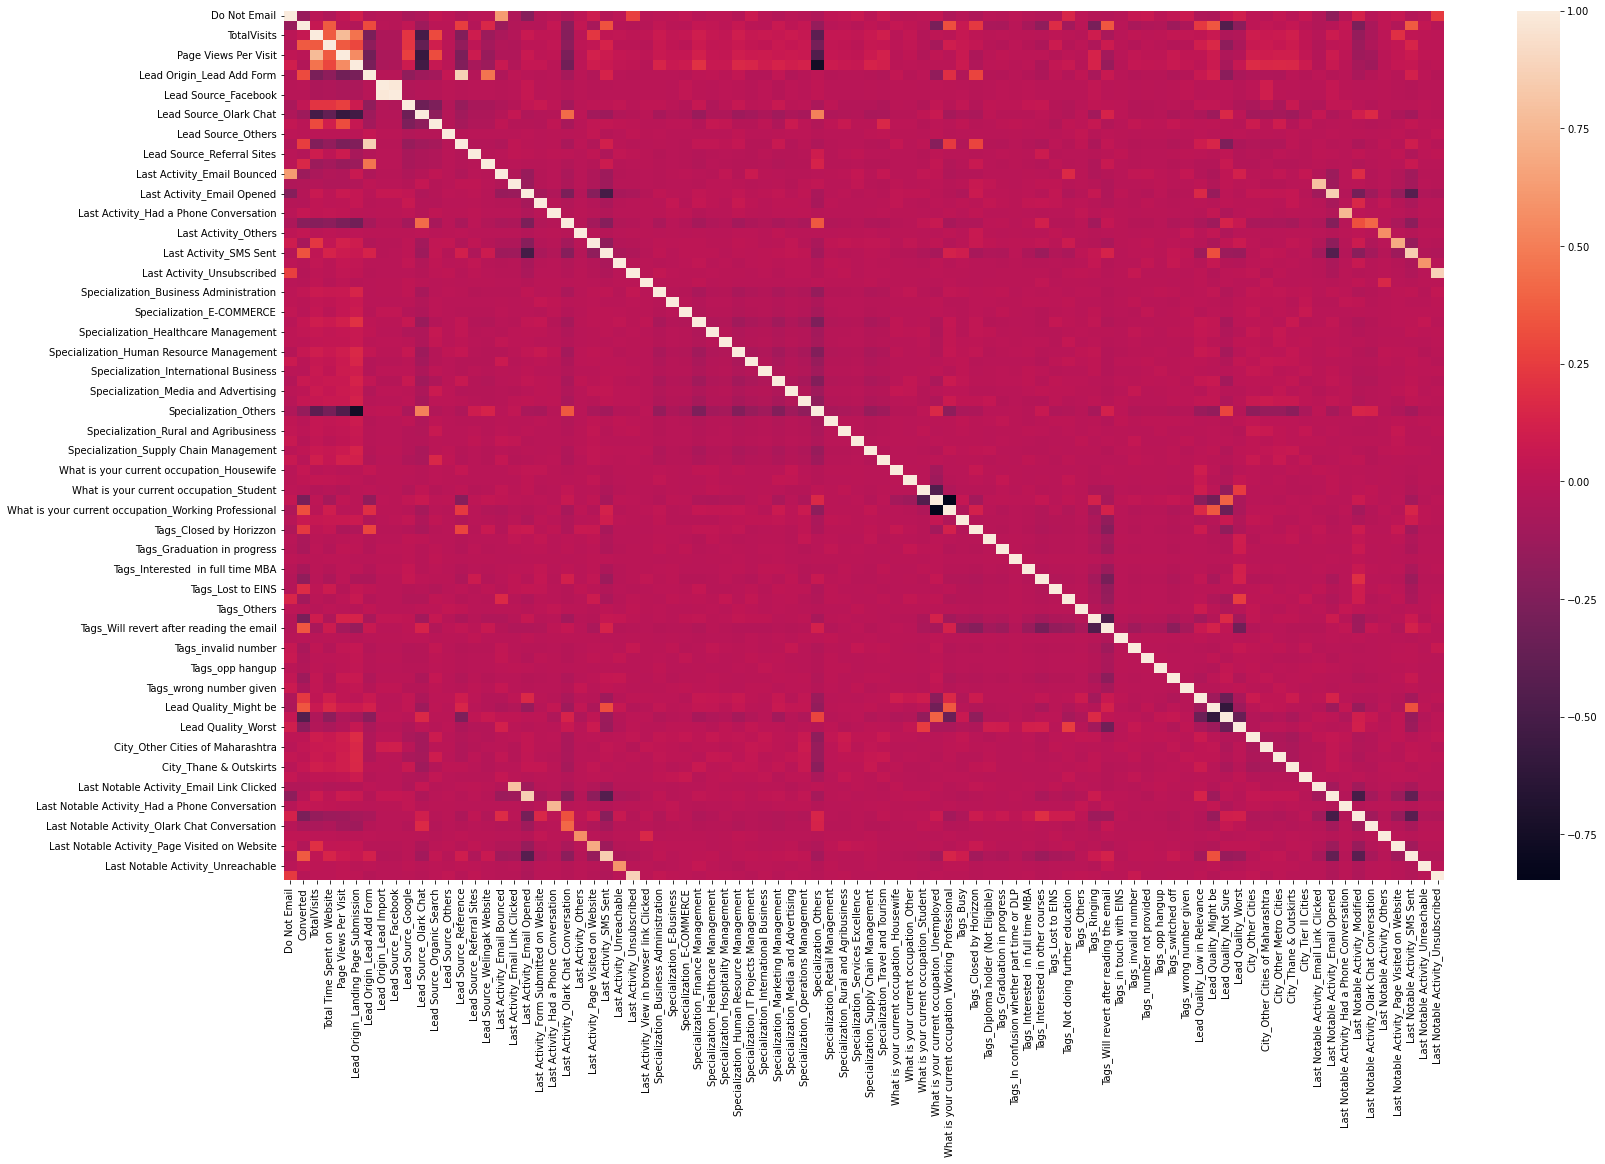

In [79]:
# Looking at the correlation table
plt.figure(figsize = (26,16))
sns.heatmap(df.corr())
plt.show()

### Model Building

Let's now move to model building. As we can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

#### Feature Selection using RFE

In [80]:
# To create an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [81]:
from sklearn.feature_selection import RFE

# Initialize RFE with Logistic Regression estimator and specify number of features to select
rfe = RFE(estimator=LR, n_features_to_select=15)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [82]:
# To check output of RFE
rfe.support_

array([ True, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False,  True,  True, False,
        True, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False])

In [83]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('Lead Source_Facebook', False, 43),
 ('Lead Source_Google', False, 46),
 ('Lead Source_Olark Chat', False, 24),
 ('Lead Source_Organic Search', False, 47),
 ('Lead Source_Others', False, 49),
 ('Lead Source_Reference', False, 73),
 ('Lead Source_Referral Sites', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 51),
 ('Last Activity_Email Link Clicked', False, 40),
 ('Last Activity_Email Opened', False, 71),
 ('Last Activity_Form Submitted on Website', False, 72),
 ('Last Activity_Had a Phone Conversation', False, 12),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Others', False, 37),
 ('Last Activity_Page Visited on Website', False, 42),
 ('Last

In [84]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [85]:
# Features eliminated
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Special

### Assessing the Model with StatsModels

In [86]:
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [88]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [89]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [90]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

Model 1
Running the first model by using the features selected by RFE

In [91]:
X1, logm1 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1407.3
Date:                Sun, 14 Apr 2024   Deviance:                       2814.5
Time:                        13:44:27   Pearson chi2:                 2.35e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5893
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Tags_invalid number has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

Model 2

In [92]:
col1 = col.drop('Tags_invalid number',1)

# To rebuild the model
X2, logm2 = build_model(X_train[col1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1412.9
Date:                Sun, 14 Apr 2024   Deviance:                       2825.7
Time:                        13:44:31   Pearson chi2:                 2.31e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5886
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Tags_number not provided has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

Model 3

In [93]:
col2 = col1.drop('Tags_wrong number given',1)

# To rebuild the model
X3,logm3 = build_model(X_train[col2],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1415.6
Date:                Sun, 14 Apr 2024   Deviance:                       2831.1
Time:                        13:44:35   Pearson chi2:                 2.32e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5882
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

We also have to check VIFs (Variance Inflation Factors) of features to see if there's any multicollinearity present.

In [94]:
check_VIF(X3)

,Features,VIF
8,Tags_Will revert after reading the email,3.18
10,Lead Quality_Not Sure,2.63
1,Total Time Spent on Website,1.90
2,Lead Origin_Lead Add Form,1.67
7,Tags_Ringing,1.59
12,Last Notable Activity_SMS Sent,1.56
3,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.21
4,Tags_Busy,1.13
9,Tags_switched off,1.11


In [95]:
# To get predicted values on train set
y_train_pred_final = get_pred(X3,logm3)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.173666,3009,0
1,0,0.033737,1012,0
2,0,0.000378,9226,0
3,1,0.939257,4750,1
4,1,0.995679,7987,1


In [96]:
# Confusion Matrix and accuracy
CM = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3701  204]
 [ 297 2149]]
Training Accuracy:  0.9211147850732169


### Metrics beyond simply Accuracy

In [97]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [98]:
other_metrics(CM)

Sensitivity:  0.8785772690106296
Specificity:  0.9477592829705506
False postive rate - predicting the lead conversion when the lead does not convert:  0.05224071702944942
Positive predictive value:  0.9133021674458138
Negative predictive value:  0.9257128564282141


### Plotting the ROC Curve

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3) The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [99]:
# Function to plot ROC
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

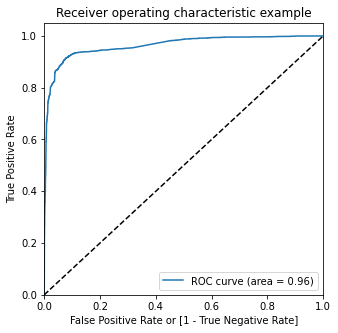

In [101]:
# To plot ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [102]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.9630700728566748


Area under curve (auc) is approximately 0.96 which is very close to ideal auc of 1.

### Finding Optimal Cutoff Point

Optimal cutoff probability is the prob where we get balanced sensitivity and specificity.

In [103]:
# To create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.173666,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.033737,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000378,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.939257,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.995679,7987,1,1,1,1,1,1,1,1,1,1,1


In [104]:
# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.795780  0.952576  0.697567
0.2   0.2  0.906157  0.934996  0.888092
0.3   0.3  0.916549  0.920278  0.914213
0.4   0.4  0.920485  0.905560  0.929834
0.5   0.5  0.921115  0.878577  0.947759
0.6   0.6  0.910093  0.825838  0.962868
0.7   0.7  0.910093  0.806623  0.974904
0.8   0.8  0.894505  0.749387  0.985403
0.9   0.9  0.868840  0.674571  0.990525


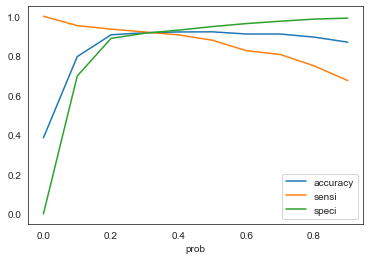

In [105]:
# To plot accuracy, sensitivity and specificity for various probabilities
sns.set_style('white')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.2 is the optimum point to take as a cutoff probability.

In [106]:
# Using 0.2 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.173666,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.033737,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000378,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.939257,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.995679,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [107]:
# Confusion matrix and Overall Accuracy
CM2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3631  274]
 [ 231 2215]]
Training Accuracy:  0.9204849629979531


In [108]:
# Other metrics
other_metrics(CM2)

Sensitivity:  0.9055600981193785
Specificity:  0.9298335467349552
False postive rate - predicting the lead conversion when the lead does not convert:  0.07016645326504481
Positive predictive value:  0.8899156287665729
Negative predictive value:  0.9401864319005696


### Classification Report

In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3905
           1       0.89      0.91      0.90      2446

    accuracy                           0.92      6351
   macro avg       0.92      0.92      0.92      6351
weighted avg       0.92      0.92      0.92      6351



### Precision and Recall

In [110]:

TP = CM2[1,1] # true positive 
TN = CM2[0,0] # true negatives
FP = CM2[0,1] # false positives
FN = CM2[1,0] # false negatives

In [111]:
# Calculate Sensitivity

TP/(TP+FN)

0.9055600981193785

In [112]:
# Calculate Specificity

TN/(TN+FP)

0.9298335467349552

In [113]:
from sklearn.metrics import precision_score, recall_score

In [114]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9133021674458138

In [115]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8785772690106296

### Precision and Recall Tradeoff

In [116]:
from sklearn.metrics import precision_recall_curve

In [117]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [118]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

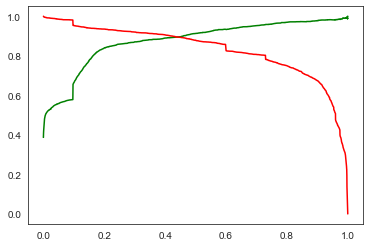

In [119]:
# To plot precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the curve above, 0.2 is the optimum point to take as a cutoff probability using Precision-Recall. We can check our accuracy using this cutoff too.

In [120]:
# Using 0.2 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.173666,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.033737,1012,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.000378,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.939257,4750,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.995679,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [121]:
# Confusion matrix and overall accuracy
CM3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3533  372]
 [ 178 2268]]
Training Accuracy:  0.913399464651236


In [122]:
# Other metrics
other_metrics(CM3)

Sensitivity:  0.9272281275551921
Specificity:  0.9047375160051216
False postive rate - predicting the lead conversion when the lead does not convert:  0.09526248399487836
Positive predictive value:  0.8590909090909091
Negative predictive value:  0.9520344920506602


Accuracy and other metrics yield similar values for both the cutoffs. We'll use the cutoff of 0.2 as derived earlier for predictions on the test set.

### Making Predictions on the Test Set

In [123]:
# Feature transform on Test set
X_test[num_var] = MMS.fit_transform(X_test[num_var])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,0.4,0.069102,0.666667,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1490,0,0.5,0.665933,0.833333,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7936,0,0.2,0.032570,0.333333,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4216,0,0.0,0.000000,0.000000,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3830,0,0.8,0.072183,1.000000,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [124]:
# To get final features
X_test_sm = X_test[col2]

In [125]:
# To add a constant
X_test_sm = sm.add_constant(X_test_sm)

In [126]:
# Making predictions
y_test_pred = logm3.predict(X_test_sm)

y_test_pred[:10]

3271    0.122163
1490    0.970828
7936    0.108133
4216    0.999138
3830    0.123416
1800    0.753670
6507    0.006479
4821    0.000566
4223    0.996977
4714    0.096839
dtype: float64

In [127]:
# To convert y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
3271,0.122163
1490,0.970828
7936,0.108133
4216,0.999138
3830,0.123416


In [128]:
# To convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [129]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [130]:
# To remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [131]:
# To append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.122163
1,1,1490,0.970828
2,0,7936,0.108133
3,1,4216,0.999138
4,0,3830,0.123416


In [132]:
# To Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.122163
1,1,1490,0.970828
2,0,7936,0.108133
3,1,4216,0.999138
4,0,3830,0.123416


In [133]:
# To put the threshold of 0.2 as derived
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.122163,0
1,1,1490,0.970828,1
2,0,7936,0.108133,0
3,1,4216,0.999138,1
4,0,3830,0.123416,0


In [134]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))

Area under curve:  0.9561377575475561


In [135]:
# Confusion matrix and overall accuracy
confusion_test = conf_mat(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1533  201]
 [  75  914]]
Training Accuracy:  0.8986412045538009


In [136]:
# Other metrics
other_metrics(confusion_test)

Sensitivity:  0.9241658240647118
Specificity:  0.884083044982699
False postive rate - predicting the lead conversion when the lead does not convert:  0.11591695501730104
Positive predictive value:  0.8197309417040358
Negative predictive value:  0.9533582089552238


### Classification Report

In [137]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3905
           1       0.89      0.91      0.90      2446

    accuracy                           0.92      6351
   macro avg       0.92      0.92      0.92      6351
weighted avg       0.92      0.92      0.92      6351



### Model Building using PCA

In our first model, we used RFE for feature elimination and then manually eliminated the features which were insignificant. We can also try to use PCA (Principal Component Analysis) for reducing the features i.e. finding the principal components.

In [138]:
# Improting PCA module
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=42)

In [139]:
# PCA on train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

We'll plot and analyse the screeplot to assess the number of needed principal components. Screeplot plots the cumulative variance against the number of components.

In [140]:
pca.explained_variance_ratio_

array([1.38646211e-01, 1.25905286e-01, 8.87443712e-02, 6.52995497e-02,
       5.50897575e-02, 4.82344147e-02, 3.23970458e-02, 2.79910903e-02,
       2.41577437e-02, 2.31872764e-02, 2.07023399e-02, 2.03323325e-02,
       1.93900869e-02, 1.87363405e-02, 1.60470911e-02, 1.52442099e-02,
       1.46549791e-02, 1.39593604e-02, 1.28309935e-02, 1.13780206e-02,
       1.10847978e-02, 1.07896476e-02, 1.00155303e-02, 9.52931387e-03,
       9.15824847e-03, 9.13070014e-03, 8.42476525e-03, 8.23259058e-03,
       7.90680436e-03, 6.76563202e-03, 6.47723696e-03, 6.02372313e-03,
       5.77581258e-03, 5.20433638e-03, 4.66039420e-03, 4.57299831e-03,
       4.46347724e-03, 4.31739165e-03, 4.15346668e-03, 4.02716290e-03,
       3.89254455e-03, 3.73293430e-03, 3.64783388e-03, 3.38160407e-03,
       3.31850053e-03, 2.94731993e-03, 2.89180487e-03, 2.79034451e-03,
       2.64037718e-03, 2.50445136e-03, 2.46000408e-03, 2.44282197e-03,
       2.41428253e-03, 2.26571498e-03, 2.13397402e-03, 1.94911766e-03,
      

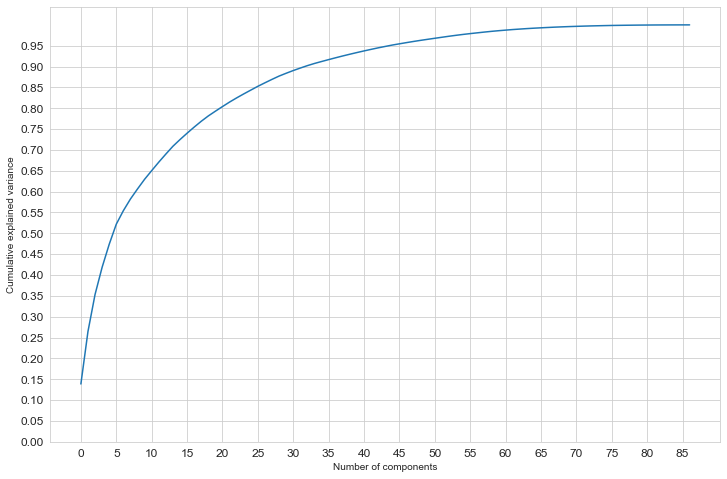

In [141]:
# To make the screeplot

fig = plt.figure(figsize = (12,8))
# To set style to grids for better visualisation
sns.set_style('whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.xticks(np.arange(0, 90, step=5), size = 12)
plt.yticks(np.arange(0.0, 1.0, step=0.05), size = 12)
plt.show()
# To change the style back
sns.set_style('white')

Looks like 25 components are enough to describe 90% of the variance in the dataset. We'll choose 25 components for our modeling.

In [142]:
# To use incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=25)

In [143]:
# To get principal components of the train data
df_train_pca = pca_final.fit_transform(X_train)

df_train_pca.shape

(6351, 25)

In [144]:
# To create correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

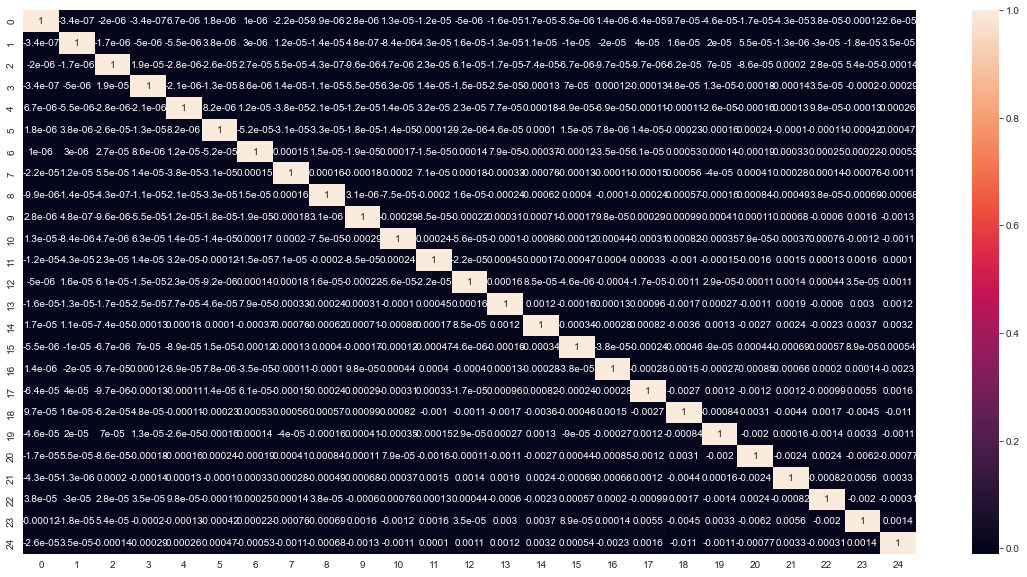

In [145]:
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

As expected, there is negligible correlation between the principal components.

In [146]:
# To apply selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2723, 25)

### Applying Logistic Regression on Principal Components

In [147]:
# To train the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

### Making Predictions

In [148]:
# On train data
#pred_train = model_pca.predict(df_train_pca)
#conf1 = conf_mat(y_train, pred_train)
#other_metrics(conf1)

pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
print("Area under curve: ", metrics.roc_auc_score(y_train, pred_probs_train))

Area under curve:  0.9499983248932381


In [149]:
# On test data
#pred_test = model_pca.predict(df_test_pca)
#conf2 = conf_mat(y_test, pred_test)
#other_metrics(conf2)

pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
print("Area under curve: ", metrics.roc_auc_score(y_test, pred_probs_test))

Area under curve:  0.9357333785830992


After comparing both the models, our first model using RFE and manual feature elimination is better than the model built using PCA.

1) In PCA, we are not able to directly see which features are impacting the conversion and how. Independent variables are less interpretable.
2) When evaluation metrics are compared, models are comparable and our first model even outperforms the model built using PCA. 3) Area under curve is closer to 1.00 for both training and testing data when the first model is used.
4) Also, for explaining 90% of the variance, we require 25 principal components. For explaining more variance, more variables will be required. Using large number of components/variables unecessarily

### Assigning Lead Score

Lead Score = 100 * ConversionProbability
This needs to be calculated for all the leads from the original dataset (train + test).

In [150]:
# To select test set
df_test_pred = y_pred_final.copy()
df_test_pred.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.122163,0
1,1,1490,0.970828,1
2,0,7936,0.108133,0
3,1,4216,0.999138,1
4,0,3830,0.123416,0


In [151]:
# To select train set
df_train_pred = y_train_pred_final.copy()
df_train_pred.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.173666,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.033737,1012,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.000378,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.939257,4750,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.995679,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [152]:
# To drop unnecessary columns from train set
df_train_pred = df_train_pred[['Lead ID','Converted','Converted_prob','final_predicted']]
df_train_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.173666,0
1,1012,0,0.033737,0
2,9226,0,0.000378,0
3,4750,1,0.939257,1
4,7987,1,0.995679,1


In [153]:
# To concatenate 2 datasets
df_full_pred = df_train_pred.append(df_test_pred)
df_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.173666,0
1,1012,0,0.033737,0
2,9226,0,0.000378,0
3,4750,1,0.939257,1
4,7987,1,0.995679,1


In [154]:
# To inspect the shape of the final dataset
print(df_train_pred.shape)
print(df_test_pred.shape)
print(df_full_pred.shape)

(6351, 4)
(2723, 4)
(9074, 4)


In [155]:
# To ensure uniqueness of Lead IDs
len(df_full_pred['Lead ID'].unique().tolist())

9074

### Determining Feature Importance

In [156]:
# To display features with corrsponding coefficients in final model
pd.options.display.float_format = '{:.2f}'.format
new_params = logm3.params[1:]
new_params

Do Not Email                               -1.44
Total Time Spent on Website                 3.77
Lead Origin_Lead Add Form                   2.17
Lead Source_Welingak Website                3.08
Tags_Busy                                   3.38
Tags_Closed by Horizzon                     7.79
Tags_Lost to EINS                           8.89
Tags_Ringing                               -1.74
Tags_Will revert after reading the email    3.90
Tags_switched off                          -2.47
Lead Quality_Not Sure                      -3.22
Lead Quality_Worst                         -3.83
Last Notable Activity_SMS Sent              2.63
dtype: float64

In [157]:
# Relative feature importance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                               -16.24
Total Time Spent on Website                 42.44
Lead Origin_Lead Add Form                   24.46
Lead Source_Welingak Website                34.69
Tags_Busy                                   37.97
Tags_Closed by Horizzon                     87.64
Tags_Lost to EINS                          100.00
Tags_Ringing                               -19.61
Tags_Will revert after reading the email    43.90
Tags_switched off                          -27.81
Lead Quality_Not Sure                      -36.27
Lead Quality_Worst                         -43.05
Last Notable Activity_SMS Sent              29.60
dtype: float64

In [158]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                11
Total Time Spent on Website                 10
Lead Origin_Lead Add Form                    9
Lead Source_Welingak Website                 7
Tags_Busy                                    0
Tags_Closed by Horizzon                      2
Tags_Lost to EINS                           12
Tags_Ringing                                 3
Tags_Will revert after reading the email     4
Tags_switched off                            1
Lead Quality_Not Sure                        8
Lead Quality_Worst                           5
Last Notable Activity_SMS Sent               6
dtype: int64

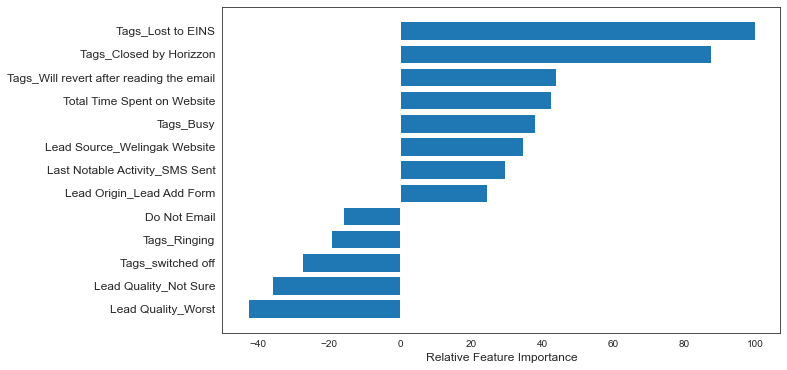

In [159]:
# To plot features with their relative importance
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col2].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

### Conclusion

After trying out saveral models, our final model has following characteristics:

1) All p-values are very close to zero.
2) VIFs for all features are very low. There is hardly any multicollinearity present.
3) The overall testing accuracy of 89.86% at a probability threshold of 0.11 is also very good.

Twelve features were selected as the most significant in predicting the conversion:

1) Features having positive impact on conversion probability in decreasing order of impact:

                                                                                Features with Positive Coefficient Values
                                                                                Tags_Lost to EINS
                                                                                Tags_Closed by Horizzon
                                                                                Tags_Will revert after reading the email
                                                                                Tags_Busy
                                                                                Lead Source_Welingak Website
                                                                                Last Notable Activity_SMS Sent
                                                                                Lead Origin_Lead Add Form
                                    
                                    
2) Features having negative impact on conversion probability in decreasing order of impact:
    
                                                                                Features with Negative Coefficient Values
                                                                                Lead Quality_Worst
                                                                                Lead Quality_Not Sure
                                                                                Tags_switched off
                                                                                Tags_Ringing
                                                                                Do Not Email
